<a href="https://colab.research.google.com/github/dlwogns/ML-DL/blob/main/Digit%20Recognizer/Digit_Recognizer(0_989).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [34]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/digit-recognizer/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/digit-recognizer/test.csv")

In [35]:
y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

In [36]:
X_train = X_train/255.0
test = test/255.0

In [37]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1, 28,28,1)
# reshape에 -1이 들어가면 "원래 배열의 길이와 남은 차원으로 부터 추정"의 의미로, auto랑 비슷하게 쓰면 되는거 같음.
# 28 * 28 * 1의 3차원으로 만드는 이유는 CNN의 구조 때문.

In [38]:
# Label Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [39]:
# split training and validiation set
X_train, X_val, Y_train , Y_val = train_test_split(X_train, y_train, test_size = 0.1)

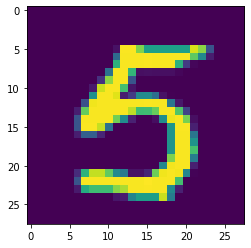

In [40]:
plt.imshow(X_train[0][:,:,0])

In [41]:
learning_rate = 0.001
training_epochs = 40
batch_size = 128

In [42]:
tf.model = tf.keras.Sequential()

In [43]:
#layer 1
tf.model.add(Conv2D(filters=16, kernel_size = (3,3), input_shape=(28,28,1), activation='relu'))
tf.model.add(MaxPooling2D(pool_size=(2,2)))
tf.model.add(Dropout(0.3))

In [44]:
#layer 2
tf.model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
tf.model.add(MaxPooling2D(pool_size=(2,2)))
tf.model.add(Dropout(0.3))

In [45]:
#layer 3
tf.model.add(Flatten())
tf.model.add(Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

In [46]:
tf.model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = learning_rate), metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [47]:
tf.model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 32)         

In [48]:
history = tf.model.fit(X_train, Y_train, batch_size = batch_size, epochs = training_epochs)

Epoch 1/40
296/296 [==============================] - 2s 5ms/step - loss: 0.6116 - accuracy: 0.8100
Epoch 2/40
296/296 [==============================] - 1s 4ms/step - loss: 0.2055 - accuracy: 0.9372
Epoch 3/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1573 - accuracy: 0.9519
Epoch 4/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1297 - accuracy: 0.9609
Epoch 5/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1103 - accuracy: 0.9661
Epoch 6/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9677
Epoch 7/40
296/296 [==============================] - 1s 4ms/step - loss: 0.0925 - accuracy: 0.9709
Epoch 8/40
296/296 [==============================] - 1s 4ms/step - loss: 0.0864 - accuracy: 0.9733
Epoch 9/40
296/296 [==============================] - 1s 4ms/step - loss: 0.0810 - accuracy: 0.9752
Epoch 10/40
296/296 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9763

In [49]:
validation = tf.model.evaluate(X_val, Y_val)

132/132 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9879


In [50]:
result = tf.model.predict(test)

875/875 [==============================] - 1s 2ms/step


In [51]:
results = np.argmax(result, axis=1)

In [52]:
results = pd.Series(results, name="Label")

In [53]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)